
### Ensemble Model

In [ ]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

import yfinance as yf
import pandas_datareader as pdr

import warnings
warnings.filterwarnings('ignore')

In [3]:
import requests
import json
import xml.etree.ElementTree as ET
import csv
import pandas as pd

def getData(APIkey,requestType,requestStartNum,requestFinishNum,statisticalTableCode,period,startDate,finishDate,statisticalItemCode):
  url="http://ecos.bok.or.kr/api/StatisticSearch/"+APIkey+"/"+requestType+"/kr/"+requestStartNum+"/"+requestFinishNum+"/"+statisticalTableCode+"/"+period+"/"+startDate+"/"+finishDate+"/"+statisticalItemCode+"/?/?/?"
  print(url)
  response = requests.get(url)

  if response.status_code == 200 : 
    try : 
        contents = response.text
        ecosRoot = ET.fromstring(contents) 
        print(contents)
        if ecosRoot[0].text[:4] in ('INFO','ERRO'):
            
            print("wrong!")
            print(ecosRoot[0].text + " : "+ ecosRoot[1].text)
        else:
            
            exchangeRates=[] 
            iter_element=ecosRoot.iter(tag="row") 
            for element in iter_element: 
                exchangeRate=[element.find("TIME").text,element.find("DATA_VALUE").text] 
                exchangeRates.append(exchangeRate)
            df=pd.DataFrame(exchangeRates,columns=['TIME','DATA_VALUE'])
            
            output_file="API_"+ statisticalTableCode+"_"+statisticalItemCode+".csv" 
            df.to_csv(output_file) 
            return df 
    except Exception as e:
        print(str(e))

In [ ]:
df_exchangeRate=getData(APIkey= "YX92F6QMLR9YBMXZVG3G",
            requestType="xml",
            requestStartNum="1",
            requestFinishNum="2682",
            statisticalTableCode="731Y001",
            period="D",
            startDate="20100101",
            finishDate="20221231",
            statisticalItemCode="0000001")
print(df_exchangeRate)


df_KORIBOR=getData(APIkey= "YX92F6QMLR9YBMXZVG3G",
            requestType="xml",
            requestStartNum="1",
            requestFinishNum="2682",
            statisticalTableCode="817Y002",
            period="D",
            startDate="20100101",
            finishDate="20221231",
            statisticalItemCode="010150000")
print(df_KORIBOR)


df_CD=getData(APIkey= "YX92F6QMLR9YBMXZVG3G",
            requestType="xml",
            requestStartNum="1",
            requestFinishNum="2682",
            statisticalTableCode="817Y002",
            period="D",
            startDate="20100101",
            finishDate="20221231",
            statisticalItemCode="010502000")
print(df_CD)


In [5]:
df_exchangeRate['DATA_VALUE'] = df_exchangeRate['DATA_VALUE'].astype('float64')
df_KORIBOR['DATA_VALUE'] = df_KORIBOR['DATA_VALUE'].astype('float64')
df_CD['DATA_VALUE'] = df_CD['DATA_VALUE'].astype('float64')

In [6]:
df_KORIBOR.head()

,TIME,DATA_VALUE
0,20100104,2.86
1,20100105,2.87
2,20100106,2.87
3,20100107,2.88
4,20100108,2.88


In [7]:
df_exchangeRate.rename(columns = {'TIME' : 'Date'}, inplace = True)
df_KORIBOR.rename(columns = {'TIME' : 'Date'}, inplace = True)
df_CD.rename(columns = {'TIME' : 'Date'}, inplace = True)

In [8]:
df_exchangeRate.head()

,Date,DATA_VALUE
0,20100104,1167.6
1,20100105,1156.2
2,20100106,1144.3
3,20100107,1138.2
4,20100108,1133.2


In [9]:
df_exchangeRate['Date'] = pd.to_datetime(df_exchangeRate.Date)
df_KORIBOR['Date'] = pd.to_datetime(df_KORIBOR.Date)
df_CD['Date'] = pd.to_datetime(df_CD.Date)

In [10]:
df_exchangeRate.head()

,Date,DATA_VALUE
0,2010-01-04,1167.6
1,2010-01-05,1156.2
2,2010-01-06,1144.3
3,2010-01-07,1138.2
4,2010-01-08,1133.2


In [11]:
df_exchangeRate.set_index('Date', inplace=True)
df_KORIBOR.set_index('Date', inplace=True)
df_CD.set_index('Date', inplace=True)

In [12]:
df_exchangeRate.head()

,DATA_VALUE
Date,
2010-01-04,1167.6
2010-01-05,1156.2
2010-01-06,1144.3
2010-01-07,1138.2
2010-01-08,1133.2


In [13]:
df_CD

,DATA_VALUE
Date,
2010-01-04,2.88
2010-01-05,2.88
2010-01-06,2.88
2010-01-07,2.88
2010-01-08,2.88
...,...
2020-10-26,0.63
2020-10-27,0.63
2020-10-28,0.63


In [14]:
df_KORIBOR

,DATA_VALUE
Date,
2010-01-04,2.86
2010-01-05,2.87
2010-01-06,2.87
2010-01-07,2.88
2010-01-08,2.88
...,...
2020-10-26,0.64
2020-10-27,0.64
2020-10-28,0.64


In [15]:
start = datetime(2010,1,1)
end = datetime(2022,12,31)

In [16]:
ksp = yf.download('^KS11', start,end) # KOSPI
ss = yf.download('005930.KS', start,end) # 삼성전자
hm = yf.download('005380.KS', start,end) # 현대차 
snp = yf.download('^GSPC', start,end) #S&P500
nki = yf.download('^N225', start,end) # Nikkei 225
uxt = yf.download('^N100', start,end) # EURONEXT 100
vix = yf.download('^VIX', start,end) # VIX

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
ksp.shape

(3203, 6)

In [18]:
snp.shape

(3271, 6)

In [19]:
ss.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,12571.508789,11950800
2010-01-05,16520.0,16580.0,16300.0,16440.0,12773.523438,27925850
2010-01-06,16580.0,16820.0,16520.0,16820.0,13068.775391,22948850
2010-01-07,16820.0,16820.0,16260.0,16260.0,12633.666016,22107950
2010-01-08,16400.0,16420.0,16120.0,16420.0,12757.984375,14777550


In [20]:
ksp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,2325.860107,2333.080078,2311.899902,2313.689941,2313.689941,367000
2022-12-26,2312.540039,2321.919922,2304.199951,2317.139893,2317.139893,427600
2022-12-27,2327.520020,2335.989990,2321.479980,2332.790039,2332.790039,448300
2022-12-28,2296.449951,2296.449951,2276.899902,2280.449951,2280.449951,405700
2022-12-29,2265.729980,2272.669922,2236.379883,2236.399902,2236.399902,361000


In [21]:
snp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [22]:
stk = pd.DataFrame({
    'ss': ss['Adj Close'],
    'hm': hm['Adj Close'],
    'ksp': ksp['Adj Close'],
    'snp': snp['Adj Close'],
    'nki': nki['Adj Close'],
    'uxt': uxt['Adj Close'],
    'vix': vix['Adj Close'],
    'exr': df_exchangeRate['DATA_VALUE'],
    'koribor': df_KORIBOR['DATA_VALUE'],
    'cd': df_CD['DATA_VALUE']
}).dropna()

In [23]:
stk.tail()

,ss,hm,ksp,snp,nki,uxt,vix,exr,koribor,cd
Date,,,,,,,,,,
2020-10-26,56144.445312,157826.062500,2343.909912,3400.969971,23494.339844,964.159973,32.459999,1134.6,0.64,0.63
2020-10-27,55586.722656,158746.343750,2330.840088,3390.679932,23485.800781,954.159973,33.349998,1129.1,0.64,0.63
2020-10-28,54843.082031,159666.625000,2345.260010,3271.030029,23418.509766,926.450012,40.279999,1127.6,0.64,0.63
2020-10-29,54006.496094,156445.687500,2326.669922,3310.110107,23331.939453,927.950012,37.590000,1129.3,0.64,0.63
2020-10-30,52612.175781,151384.203125,2267.149902,3269.959961,22977.130859,930.909973,38.020000,1133.4,0.64,0.63


In [24]:
# 연속시간 수익률 (로그 차분)

rtn = ( np.log(stk) - np.log(stk.shift(1)) )*100
rtn.columns=['r_ss' ,'r_hm','r_ksp','r_snp','r_nki','r_uxt','r_vix','r_exr','r_koribor','r_cd']

In [25]:
rtn.tail()

,r_ss,r_hm,r_ksp,r_snp,r_nki,r_uxt,r_vix,r_exr,r_koribor,r_cd
Date,,,,,,,,,,
2020-10-26,0.331671,2.658942,-0.718437,-1.876447,-0.094659,-1.626470,16.400603,0.044078,0.0,0.0
2020-10-27,-0.998338,0.581405,-0.559168,-0.303021,-0.036352,-1.042588,2.704919,-0.485931,0.0,0.0
2020-10-28,-1.346832,0.578044,0.616752,-3.592554,-0.286929,-2.947125,18.879731,-0.132937,0.0,0.0
2020-10-29,-1.537172,-2.037914,-0.795825,1.187652,-0.370351,0.161777,-6.911698,0.150649,0.0,0.0
2020-10-30,-2.615677,-3.288791,-2.591453,-1.220371,-1.532380,0.318471,1.137429,0.362399,0.0,0.0


In [26]:
# Momentum : 주가 수익률 추이 pct_change()

stklag=stk.shift(1) 
stklag

stk_1d = stklag.pct_change()*100   
stk_1d.columns = ['%s_1d'%col for col in stk.columns] 

stk_2d = stklag.pct_change(periods=2)*100   
stk_2d.columns = ['%s_2d'%col for col in stk.columns] 

stk_3d = stklag.pct_change(periods=3)*100   
stk_3d.columns = ['%s_3d'%col for col in stk.columns] 

stk_4d = stklag.pct_change(periods=4)*100   
stk_4d.columns = ['%s_4d'%col for col in stk.columns] 

stk_1w = stklag.pct_change(periods=5)*100   
stk_1w.columns = ['%s_1w'%col for col in stk.columns] 

stk_2w = stklag.pct_change(periods=10)*100   
stk_2w.columns = ['%s_2w'%col for col in stk.columns] 

stk_1m = stklag.pct_change(periods=20)*100   
stk_1m.columns = ['%s_1m'%col for col in stk.columns] 

stk_3m = stklag.pct_change(periods=60)*100   
stk_3m.columns = ['%s_3m'%col for col in stk.columns]

stk_6m = stklag.pct_change(periods=120)*100   
stk_6m.columns = ['%s_6m'%col for col in stk.columns]

stk_12m = stklag.pct_change(periods=240)*100   
stk_12m.columns = ['%s_12m'%col for col in stk.columns]

In [27]:
stk_3d.tail()

,ss_3d,hm_3d,ksp_3d,snp_3d,nki_3d,uxt_3d,vix_3d,exr_3d,koribor_3d,cd_3d
Date,,,,,,,,,,
2020-10-26,-1.149430,-0.298501,0.101770,0.646791,-0.214067,-0.957110,-6.132883,-0.709158,-1.538462,0.0
2020-10-27,-0.821028,3.625366,-1.136727,-1.006825,-0.613893,-1.059027,13.298428,-0.447486,-1.538462,0.0
2020-10-28,-0.499168,6.153847,-1.028002,-1.818742,0.049123,-1.890907,18.641045,-0.405751,0.000000,0.0
2020-10-29,-1.993363,3.892228,-0.658674,-5.608600,-0.417068,-5.461388,46.206896,-0.573142,0.000000,0.0
2020-10-30,-3.807944,-0.874618,-0.735523,-2.671587,-0.691232,-3.755597,15.804070,-0.467125,0.000000,0.0


In [28]:
stk_12m.tail()

,ss_12m,hm_12m,ksp_12m,snp_12m,nki_12m,uxt_12m,vix_12m,exr_12m,koribor_12m,cd_12m
Date,,,,,,,,,,
2020-10-26,27.338564,27.280648,13.862331,16.098515,6.795773,-9.405478,72.619042,-5.016750,-57.615894,-59.354839
2020-10-27,26.982570,32.184517,12.985649,14.217725,6.558798,-11.497054,101.991286,-5.315864,-57.615894,-59.354839
2020-10-28,26.879683,32.457330,13.703403,14.480766,7.344521,-12.717824,93.670150,-5.837712,-57.615894,-59.354839
2020-10-29,23.523389,32.728108,13.679259,9.886320,7.642407,-15.713677,148.029553,-6.135020,-57.615894,-59.354839
2020-10-30,22.137163,31.522865,12.268267,12.579206,6.610388,-14.451785,102.532334,-5.828886,-57.615894,-59.354839


In [29]:
stk_m = stk_1d.join(stk_2d)\
    .join(stk_3d)\
    .join(stk_4d)\
    .join(stk_1w)\
    .join(stk_2w)\
    .join(stk_1m)\
    .join(stk_3m)\
    .join(stk_6m)\
    .join(stk_12m)\
    .dropna() 

stk_m.tail()

,ss_1d,hm_1d,ksp_1d,snp_1d,nki_1d,uxt_1d,vix_1d,exr_1d,koribor_1d,cd_1d,...,ss_12m,hm_12m,ksp_12m,snp_12m,nki_12m,uxt_12m,vix_12m,exr_12m,koribor_12m,cd_12m
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-26,0.166387,2.769227,0.244581,0.344576,0.180284,0.762941,-1.992178,0.035283,0.0,0.0,...,27.338564,27.280648,13.862331,16.098515,6.795773,-9.405478,72.619042,-5.016750,-57.615894,-59.354839
2020-10-27,0.332221,2.694607,-0.715862,-1.858952,-0.094614,-1.613314,17.822142,0.044088,0.0,0.0,...,26.982570,32.184517,12.985649,14.217725,6.558798,-11.497054,101.991286,-5.315864,-57.615894,-59.354839
2020-10-28,-0.993371,0.583098,-0.557608,-0.302562,-0.036345,-1.037172,2.741834,-0.484752,0.0,0.0,...,26.879683,32.457330,13.703403,14.480766,7.344521,-12.717824,93.670150,-5.837712,-57.615894,-59.354839
2020-10-29,-1.337803,0.579718,0.618658,-3.528788,-0.286518,-2.904121,20.779612,-0.132849,0.0,0.0,...,23.523389,32.728108,13.679259,9.886320,7.642407,-15.713677,148.029553,-6.135020,-57.615894,-59.354839
2020-10-30,-1.525417,-2.017289,-0.792666,1.194733,-0.369666,0.161908,-6.678249,0.150763,0.0,0.0,...,22.137163,31.522865,12.268267,12.579206,6.610388,-14.451785,102.532334,-5.828886,-57.615894,-59.354839


In [30]:
stk_m.columns

Index(['ss_1d', 'hm_1d', 'ksp_1d', 'snp_1d', 'nki_1d', 'uxt_1d', 'vix_1d',
       'exr_1d', 'koribor_1d', 'cd_1d', 'ss_2d', 'hm_2d', 'ksp_2d', 'snp_2d',
       'nki_2d', 'uxt_2d', 'vix_2d', 'exr_2d', 'koribor_2d', 'cd_2d', 'ss_3d',
       'hm_3d', 'ksp_3d', 'snp_3d', 'nki_3d', 'uxt_3d', 'vix_3d', 'exr_3d',
       'koribor_3d', 'cd_3d', 'ss_4d', 'hm_4d', 'ksp_4d', 'snp_4d', 'nki_4d',
       'uxt_4d', 'vix_4d', 'exr_4d', 'koribor_4d', 'cd_4d', 'ss_1w', 'hm_1w',
       'ksp_1w', 'snp_1w', 'nki_1w', 'uxt_1w', 'vix_1w', 'exr_1w',
       'koribor_1w', 'cd_1w', 'ss_2w', 'hm_2w', 'ksp_2w', 'snp_2w', 'nki_2w',
       'uxt_2w', 'vix_2w', 'exr_2w', 'koribor_2w', 'cd_2w', 'ss_1m', 'hm_1m',
       'ksp_1m', 'snp_1m', 'nki_1m', 'uxt_1m', 'vix_1m', 'exr_1m',
       'koribor_1m', 'cd_1m', 'ss_3m', 'hm_3m', 'ksp_3m', 'snp_3m', 'nki_3m',
       'uxt_3m', 'vix_3m', 'exr_3m', 'koribor_3m', 'cd_3m', 'ss_6m', 'hm_6m',
       'ksp_6m', 'snp_6m', 'nki_6m', 'uxt_6m', 'vix_6m', 'exr_6m',
       'koribor_6m', 'c

In [31]:
fifx=pd.DataFrame({
   'exr_lag':stklag['exr'],
   'koribor_lag':stklag['koribor'],
   'cd_lag':stklag['cd']
}).dropna()      

fifx

,exr_lag,koribor_lag,cd_lag
Date,,,
2010-01-05,1167.6,2.86,2.88
2010-01-06,1156.2,2.87,2.88
2010-01-07,1144.3,2.87,2.88
2010-01-08,1138.2,2.88,2.88
2010-01-12,1133.2,2.88,2.88
...,...,...,...
2020-10-26,1134.1,0.64,0.63
2020-10-27,1134.6,0.64,0.63
2020-10-28,1129.1,0.64,0.63


In [32]:
fifx1=fifx.shift() 
fifx1.columns=['exr_2lag','koribor_2lag','cd_2lag']
fifx1

,exr_2lag,koribor_2lag,cd_2lag
Date,,,
2010-01-05,NaN,NaN,NaN
2010-01-06,1167.6,2.86,2.88
2010-01-07,1156.2,2.87,2.88
2010-01-08,1144.3,2.87,2.88
2010-01-12,1138.2,2.88,2.88
...,...,...,...
2020-10-26,1133.7,0.64,0.63
2020-10-27,1134.1,0.64,0.63
2020-10-28,1134.6,0.64,0.63


In [33]:
fifx2=fifx1.shift() 
fifx2.columns=['exr_3lag','koribor_3lag','cd_3lag']
fifx2

,exr_3lag,koribor_3lag,cd_3lag
Date,,,
2010-01-05,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN
2010-01-07,1167.6,2.86,2.88
2010-01-08,1156.2,2.87,2.88
2010-01-12,1144.3,2.87,2.88
...,...,...,...
2020-10-26,1139.7,0.65,0.63
2020-10-27,1133.7,0.64,0.63
2020-10-28,1134.1,0.64,0.63


In [34]:
A = stk_m.join(stk)\
    .join(rtn)\
    .join(fifx)\
    .join(fifx1)\
    .join(fifx2)\
    .dropna()
A

,ss_1d,hm_1d,ksp_1d,snp_1d,nki_1d,uxt_1d,vix_1d,exr_1d,koribor_1d,cd_1d,...,r_cd,exr_lag,koribor_lag,cd_lag,exr_2lag,koribor_2lag,cd_2lag,exr_3lag,koribor_3lag,cd_3lag
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-24,-1.120144,-4.381424,-1.743992,0.241355,-1.559694,1.030319,2.668146,0.512360,0.671141,0.000000,...,0.332779,1118.2,3.00,3.00,1112.5,2.98,3.00,1116.8,2.98,2.98
2011-01-25,0.000000,1.078163,0.591327,0.583628,0.687047,0.337148,-4.439630,0.339832,0.333333,0.333333,...,0.000000,1122.0,3.01,3.01,1118.2,3.00,3.00,1112.5,2.98,3.00
2011-01-26,0.411968,1.066674,0.216602,0.026346,1.153294,-0.286031,-0.339940,-0.151515,0.000000,0.000000,...,0.000000,1120.3,3.01,3.01,1122.0,3.01,3.01,1118.2,3.00,3.00
2011-01-27,2.358948,4.221654,1.140096,0.422091,-0.597449,0.597373,-5.400800,-0.241007,0.000000,0.000000,...,0.331675,1117.6,3.01,3.01,1120.3,3.01,3.01,1122.0,3.01,3.01
2011-01-28,-0.400779,-0.759527,0.215595,0.224431,0.737940,0.276843,-2.944710,0.053686,0.000000,0.332226,...,0.330579,1118.2,3.01,3.02,1117.6,3.01,3.01,1120.3,3.01,3.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,0.166387,2.769227,0.244581,0.344576,0.180284,0.762941,-1.992178,0.035283,0.000000,0.000000,...,0.000000,1134.1,0.64,0.63,1133.7,0.64,0.63,1139.7,0.65,0.63
2020-10-27,0.332221,2.694607,-0.715862,-1.858952,-0.094614,-1.613314,17.822142,0.044088,0.000000,0.000000,...,0.000000,1134.6,0.64,0.63,1134.1,0.64,0.63,1133.7,0.64,0.63
2020-10-28,-0.993371,0.583098,-0.557608,-0.302562,-0.036345,-1.037172,2.741834,-0.484752,0.000000,0.000000,...,0.000000,1129.1,0.64,0.63,1134.6,0.64,0.63,1134.1,0.64,0.63


In [35]:
y = A['r_ss']
y

Date
2011-01-24    0.000000
2011-01-25    0.411121
2011-01-26    2.331554
2011-01-27   -0.401584
2011-01-28    1.596830
                ...   
2020-10-26    0.331671
2020-10-27   -0.998338
2020-10-28   -1.346832
2020-10-29   -1.537172
2020-10-30   -2.615677
Name: r_ss, Length: 2186, dtype: float64

In [36]:
x=A[['ss_1d', 'hm_1d', 'ksp_1d', 
       'r_snp', 'r_uxt', 'vix',    
       'exr_lag', 'koribor_lag', 'cd_lag',  
       'exr_2lag', 'koribor_2lag', 'cd_2lag',  
       'exr_3lag', 'koribor_3lag', 'cd_3lag',  

       'snp_1d', 'nki_1d', 'uxt_1d', 'vix_1d',
       'exr_1d', 'koribor_1d', 'cd_1d', 
       'ss_2d', 'hm_2d', 'ksp_2d', 
       'snp_2d','nki_2d', 'uxt_2d', 'vix_2d', 
       'exr_2d', 'koribor_2d', 'cd_2d', 
       'ss_3d','hm_3d', 'ksp_3d', 
       'snp_3d', 'nki_3d', 'uxt_3d', 'vix_3d', 
       'exr_3d','koribor_3d', 'cd_3d', 
       'ss_4d', 'hm_4d', 'ksp_4d', 
       'snp_4d', 'nki_4d','uxt_4d','vix_4d', 
       'exr_4d', 'koribor_4d', 'cd_4d', 
       'ss_1w', 'hm_1w','ksp_1w', 
       'snp_1w', 'nki_1w', 'uxt_1w', 'vix_1w', 
       'exr_1w','koribor_1w', 'cd_1w', 
       'ss_2w', 'hm_2w', 'ksp_2w', 
       'snp_2w', 'nki_2w','uxt_2w', 'vix_2w', 
       'exr_2w', 'koribor_2w', 'cd_2w', 
       'ss_1m', 'hm_1m','ksp_1m', 
       'snp_1m', 'nki_1m', 'uxt_1m', 'vix_1m', 
       'exr_1m','koribor_1m', 'cd_1m', 
       'ss_3m', 'hm_3m', 'ksp_3m', 
       'snp_3m', 'nki_3m','uxt_3m', 'vix_3m', 
       'exr_3m', 'koribor_3m', 'cd_3m', 
       'ss_6m', 'hm_6m','ksp_6m', 
       'snp_6m', 'nki_6m', 'uxt_6m', 'vix_6m', 
       'exr_6m','koribor_6m', 'cd_6m', 
       'ss_12m', 'hm_12m', 'ksp_12m', 
       'snp_12m','nki_12m', 'uxt_12m', 'vix_12m', 
       'exr_12m', 'koribor_12m', 'cd_12m']]
     
x

,ss_1d,hm_1d,ksp_1d,r_snp,r_uxt,vix,exr_lag,koribor_lag,cd_lag,exr_2lag,...,ss_12m,hm_12m,ksp_12m,snp_12m,nki_12m,uxt_12m,vix_12m,exr_12m,koribor_12m,cd_12m
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-24,-1.120144,-4.381424,-1.743992,0.581932,0.336581,17.650000,1118.2,3.00,3.00,1112.5,...,21.430722,57.241783,22.037090,13.271078,-3.569010,2.982832,-7.834339,-4.230901,4.895105,4.166667
2011-01-25,0.000000,1.078163,0.591327,0.026343,-0.286441,17.590000,1122.0,3.01,3.01,1118.2,...,19.510282,71.941082,23.159546,13.578287,-3.152266,3.244120,-8.785533,-2.957966,4.878049,4.513889
2011-01-26,0.411968,1.066674,0.216602,0.421202,0.595596,16.639999,1120.3,3.01,3.01,1122.0,...,17.291506,72.209571,22.362371,13.546268,-2.488296,2.845603,-8.194153,-2.097352,4.878049,4.513889
2011-01-27,2.358948,4.221654,1.140096,0.224179,0.276461,16.150000,1117.6,3.01,3.01,1120.3,...,24.193217,87.945687,25.365174,13.571116,-2.619066,3.535597,-12.696748,-1.809875,4.513889,4.513889
2011-01-28,-0.400779,-0.759527,0.215595,-1.801381,-1.086736,20.040001,1118.2,3.01,3.02,1117.6,...,22.490144,86.518188,24.760214,13.498931,-2.960277,3.286377,-10.921123,-1.323685,4.513889,4.861111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,0.166387,2.769227,0.244581,-1.876447,-1.626470,32.459999,1134.1,0.64,0.63,1133.7,...,27.338564,27.280648,13.862331,16.098515,6.795773,-9.405478,72.619042,-5.016750,-57.615894,-59.354839
2020-10-27,0.332221,2.694607,-0.715862,-0.303021,-1.042588,33.349998,1134.6,0.64,0.63,1134.1,...,26.982570,32.184517,12.985649,14.217725,6.558798,-11.497054,101.991286,-5.315864,-57.615894,-59.354839
2020-10-28,-0.993371,0.583098,-0.557608,-3.592554,-2.947125,40.279999,1129.1,0.64,0.63,1134.6,...,26.879683,32.457330,13.703403,14.480766,7.344521,-12.717824,93.670150,-5.837712,-57.615894,-59.354839


In [ ]:
x_select = A[['r_ss','ss_1d', 'hm_1d', 'ksp_1d', 
       'r_snp', 'r_uxt', 'vix',    
       'exr_lag', 'koribor_lag', 'cd_lag', 
       'exr_2lag', 'koribor_2lag', 'cd_2lag', 
       'exr_3lag', 'koribor_3lag', 'cd_3lag'    
]]
              
x_select

In [ ]:
df=x_select
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

<Axes: >

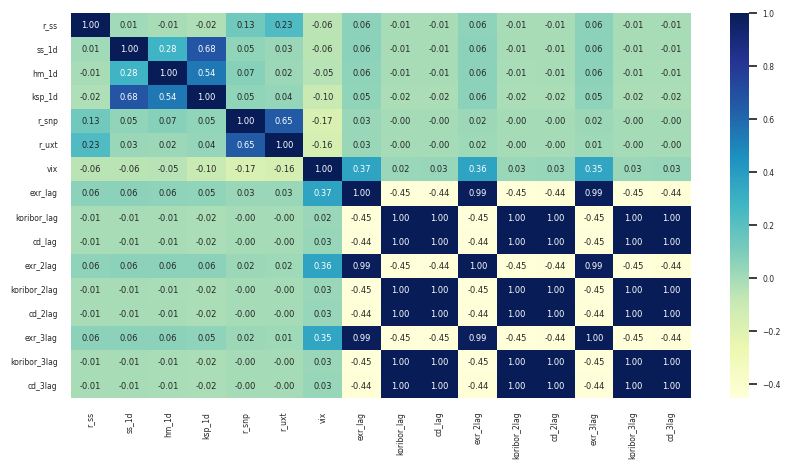

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=0.5)
plt.subplots(figsize=(10,5))
sns.heatmap(x_select.corr(),annot=True,cmap="YlGnBu",fmt=".2f")

In [ ]:
# Feature Selection

xy=A[['r_ss',
       'ss_1d', 'hm_1d', 'ksp_1d', 
       'r_snp', 'r_uxt', 'vix',    
       'exr_lag', 'koribor_lag', 'cd_lag', 
       'snp_1d', 'nki_1d', 'uxt_1d', 'vix_1d',
       'snp_2d','nki_2d', 'uxt_2d', 'vix_2d', 
       'snp_3d', 'nki_3d', 'uxt_3d', 'vix_3d', 
       'snp_4d', 'nki_4d','uxt_4d','vix_4d', 
       'snp_1w', 'nki_1w', 'uxt_1w', 'vix_1w', 
       'snp_2w', 'nki_2w','uxt_2w', 'vix_2w', 
       'snp_1m', 'nki_1m', 'uxt_1m', 'vix_1m', 
       'snp_3m', 'nki_3m','uxt_3m', 'vix_3m', 
       'snp_6m', 'nki_6m', 'uxt_6m', 'vix_6m', 
       'snp_12m','nki_12m', 'uxt_12m', 'vix_12m' 
    ]]
xy    

In [ ]:
xy.corr()

In [ ]:
# Target Feature
y=xy['r_ss']
x= xy.drop(['r_ss'] ,1)
x

In [ ]:
import statsmodels.api as sm

olsreg = sm.OLS(y, x)
result =olsreg.fit()
result.summary()

In [ ]:
# Feature Selection

x=A[[
       'ss_1d','ss_2d','ss_3d','ss_4d','ss_1w','ss_2w', 
       'ksp_1d', 
       'r_snp', 'r_uxt', 'vix',    
       'snp_1d', 'uxt_1d', 
       'nki_2d', 
       'snp_2w', 'vix_2w', 
       
       'nki_4d', 
       'vix_1d', 'vix_4d', 'vix_6m', 'vix_12m'
    
    ]]
     
x

In [47]:
from sklearn.linear_model import LinearRegression
from datetime import datetime

class LinearRegressionModel(object):
    def __init__(self): 
        self.df_result = pd.DataFrame(columns=['Actual', 'Predicted'])

    def get_model(self):
        return LinearRegression(fit_intercept=False)              

    def learn(self, df, ys, start_date, end_date, lookback_period=20):  
        model = self.get_model() 

        for date in df[start_date:end_date].index:
            
            x = self.get_prices_since(df, date, lookback_period) 
            y = self.get_prices_since(ys, date, lookback_period)
            model.fit(x, y.ravel()) 

            
            x_current = df.loc[date].values
            [y_pred] = model.predict([x_current]) 

            
            new_index = pd.to_datetime(date, format='%Y-%m-%d')
            y_actual = ys.loc[date]
            self.df_result.loc[new_index] = [y_actual, y_pred] 

    def get_prices_since(self, df, date_since, lookback):
        index = df.index.get_loc(date_since)
        return df.iloc[index-lookback:index]

In [48]:
multi_linear_model = LinearRegressionModel() 
multi_linear_model.learn(x, y, start_date='2015-01-01', end_date='2020-10-31', lookback_period=420)

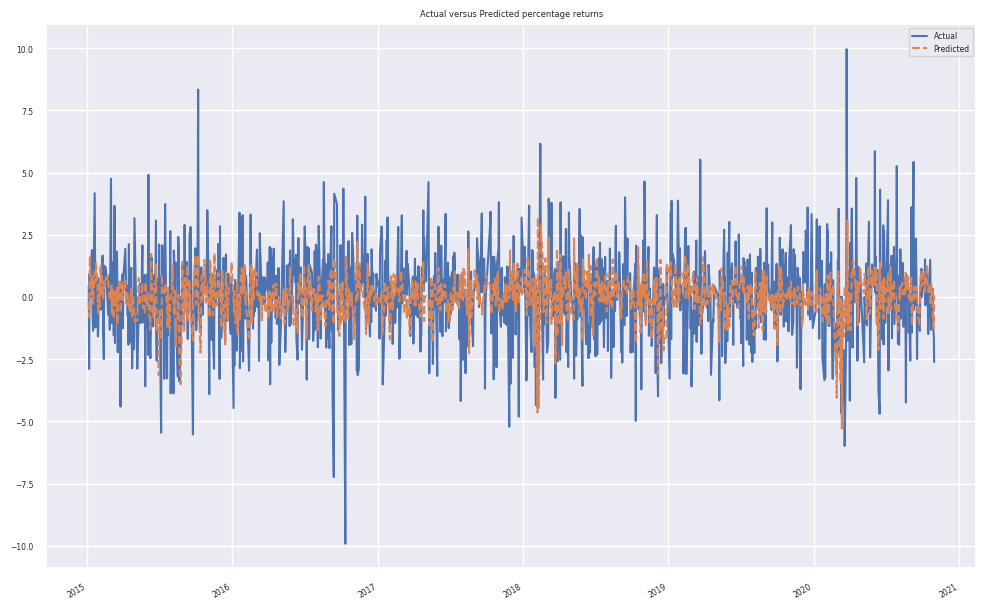

In [49]:
multi_linear_model.df_result.plot(
    title='Actual versus Predicted percentage returns', style=['-', '--'], figsize=(12,8));

In [50]:
# Metrics

from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, 
    explained_variance_score, r2_score )

def print_regression_metrics(df_result, result_df, name):
    actual = list(df_result['Actual']) 
    predicted = list(df_result['Predicted']) 

    print(name)
    print('mean_absolute_error:', 
          mean_absolute_error(actual, predicted)) 
    print('mean_squared_error:', mean_squared_error(actual, predicted)) 
    print('explained_variance_score:', 
        explained_variance_score(actual, predicted)) 
    print('r2_score:', r2_score(actual, predicted)) 
    
    new_data = {'Model name': name, 'Mean absolute error': mean_absolute_error(actual, predicted), 'Mean squared error': mean_squared_error(actual, predicted), 'Explained variance score': explained_variance_score(actual, predicted), 'R2 score': r2_score(actual, predicted)}

    result_df = result_df.append(new_data, ignore_index=True)

    return result_df

result_df = pd.DataFrame(index=range(0,0), columns=['Model name', 'Mean absolute error', 'Mean squared error', 'Explained variance score', 'R2 score'])


In [51]:
print_regression_metrics(multi_linear_model.df_result, result_df, "Linear regressor")

Linear regressor
mean_absolute_error: 1.2758368353747196
mean_squared_error: 2.9436990068005175
explained_variance_score: 0.06341901315896692
r2_score: 0.06260759002614202


,Model name,Mean absolute error,Mean squared error,Explained variance score,R2 score
0,Linear regressor,1.275837,2.943699,0.063419,0.062608


### Model 

1 Bagging Regressor

In [73]:
from sklearn.ensemble import BaggingRegressor

class BaggingRegressorModel(LinearRegressionModel):
    def get_model(self):
        return BaggingRegressor(n_estimators=20, random_state=0)

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
bagging = BaggingRegressorModel() 
bagging.learn(x, y, start_date='2015-01-01', 
              end_date='2022-12-31', lookback_period=420)

In [76]:
result_df = print_regression_metrics(bagging.df_result, result_df, "Bagging regressor")

Bagging regressor
mean_absolute_error: 1.3119302901924728
mean_squared_error: 3.086023019281226
explained_variance_score: 0.01729425206400148
r2_score: 0.01728588806265008


2 RandomForest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
class RandomForestRegressorModel(LinearRegressionModel):
    def get_model(self):            
        return RandomForestRegressor(n_estimators=20, random_state=0)

In [78]:
RandomForest = RandomForestRegressorModel() 
RandomForest.learn(x, y, start_date='2015-01-01', end_date='2022-12-31', lookback_period=420)

In [79]:
result_df = print_regression_metrics(RandomForest.df_result, result_df, "Random forests regressor")

Random forests regressor
mean_absolute_error: 1.3141427472469183
mean_squared_error: 3.091049530617848
explained_variance_score: 0.015723140468775765
r2_score: 0.015685244258812903


3 AdaBoost Regressor

In [80]:
from sklearn.ensemble import AdaBoostRegressor

class AdaBoostRegressorModel(LinearRegressionModel):
    def get_model(self):
        return AdaBoostRegressor(n_estimators=20, random_state=0)

In [81]:
adaBoost = AdaBoostRegressorModel() 
adaBoost.learn(x, y, start_date='2015-01-01',  
              end_date='2022-10-31', lookback_period=420)

In [91]:
# AdaBoost (MSE 1.02 r2_score 0.012)
# 가장 높은 성과의 모델 (cf. 선형회귀 MSE 1.07  r2_score 0.012) 

result_df = print_regression_metrics(adaBoost.df_result, result_df, "AdaBoost regressor")


AdaBoost regressor
mean_absolute_error: 1.3085050583111393
mean_squared_error: 3.053962916245638
explained_variance_score: 0.027504931818695177
r2_score: 0.02749511705620944


4 GradientBoosting

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
class GradientBoostingRegressorModel(LinearRegressionModel):
    def get_model(self):            
        return GradientBoostingRegressor(n_estimators=20, random_state=0)

In [84]:
GradientBoosting = GradientBoostingRegressorModel() 
GradientBoosting.learn(x, y, start_date='2015-01-01', end_date='2022-12-31', lookback_period=420)

In [89]:
# GradientBoosting 2번째 높은 성능의 모델

result_df = print_regression_metrics(GradientBoosting.df_result, result_df, "Gradient boosting regressor")

Gradient boosting regressor
mean_absolute_error: 1.2776704689980847
mean_squared_error: 3.00498853491628
explained_variance_score: 0.04321117758259596
r2_score: 0.04309053399090579


In [92]:
result_df.set_index('Model name', inplace=True)
result_df


,Mean absolute error,Mean squared error,Explained variance score,R2 score
Model name,,,,
NaN,1.311930,3.086023,0.017294,0.017286
NaN,1.314143,3.091050,0.015723,0.015685
NaN,1.277670,3.004989,0.043211,0.043091
NaN,1.308505,3.053963,0.027505,0.027495
NaN,1.277670,3.004989,0.043211,0.043091
NaN,1.311930,3.086023,0.017294,0.017286
NaN,1.314143,3.091050,0.015723,0.015685
NaN,1.308505,3.053963,0.027505,0.027495
NaN,1.277670,3.004989,0.043211,0.043091
